In [2]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import os
documents = {}
for filename in os.listdir("dataset/dataset"):
    # Skip files that end with .txt
    if filename.endswith(".txt"):
        continue
    with open(os.path.join("dataset/dataset", filename), "r", encoding="utf-8") as file:
        documents[filename] = file.read()

# Extract features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(documents.values())

# Cluster the documents using Agglomerative (hierarchical) clustering
n_clusters = 7  # Adjust based on your dataset
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(X.toarray())

# Output clustering result as JSON
clusters = {}
for doc_id, label in zip(documents.keys(), labels):
    clusters.setdefault(int(label), []).append(doc_id)

with open("document_clusters1.json", "w") as f:
    json.dump(clusters, f, indent=2)

print("Clustering complete. Results saved in document_clusters.json")

Clustering complete. Results saved in document_clusters.json


In [3]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import SpectralCoclustering
import os
import numpy as np

# Load documents from the "dataset" folder
documents = {}
for filename in os.listdir("dataset/dataset"):
    # Skip files that end with .txt
    if filename.endswith(".txt"):
        continue
    with open(os.path.join("dataset/dataset", filename), "r", encoding="utf-8") as file:
        documents[filename] = file.read()
# Extract features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(documents.values())

# Perform biclustering with Spectral Coclustering
n_clusters = 7  # Adjust based on your dataset
model = SpectralCoclustering(n_clusters=n_clusters, random_state=42)
model.fit(X.toarray())

# Each document is assigned to a cluster (stored in model.row_labels_)
doc_ids = list(documents.keys())
labels = model.row_labels_

# Group documents by their assigned cluster
clusters = {}
for doc_id, label in zip(doc_ids, labels):
    clusters.setdefault(int(label), []).append(doc_id)

with open("document_clusters_biclustering.json", "w") as f:
    json.dump(clusters, f, indent=2)

print("Biclustering complete. Results saved in document_clusters_biclustering.json")

Biclustering complete. Results saved in document_clusters_biclustering.json


c:\Users\saibu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [4]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import os

# Load documents from the "dataset" folder
documents = {}
for filename in os.listdir("dataset/dataset"):
    # Skip files that end with .txt
    if filename.endswith(".txt"):
        continue
    with open(os.path.join("dataset/dataset", filename), "r", encoding="utf-8") as file:
        documents[filename] = file.read()

# Extract features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(documents.values())

# Perform clustering with KMeans
n_clusters = 7  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Each document is assigned a cluster label; group documents by cluster
doc_ids = list(documents.keys())
clusters = {}
for doc_id, label in zip(doc_ids, labels):
    clusters.setdefault(int(label), []).append(doc_id)

with open("document_clusters_kmeans.json", "w") as f:
    json.dump(clusters, f, indent=2)

print("KMeans clustering complete. Results saved in document_clusters_kmeans.json")

KMeans clustering complete. Results saved in document_clusters_kmeans.json


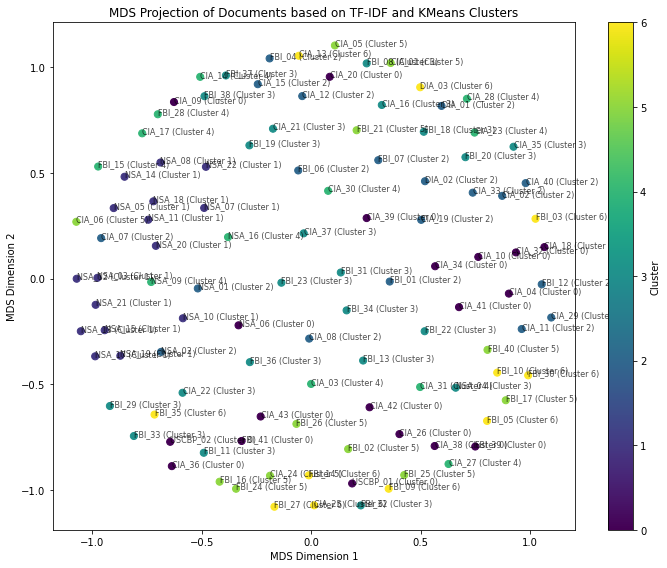

Clustering complete. Results with coordinates saved in document_clusters_mds_with_coords.json


In [5]:
import json
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

# Load documents
documents = {}
for filename in os.listdir("dataset/dataset"):
    with open(os.path.join("dataset/dataset", filename), "r", encoding="utf-8") as file:
        documents[filename] = file.read()

# Filter out files that contain "_docs.txt"
documents = {k: v for k, v in documents.items() if "_docs.txt" not in k}

# Vectorize and cluster
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(documents.values())

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Compute distances and apply MDS
dist_matrix = pairwise_distances(X, metric="euclidean")
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(dist_matrix)

# Plot for visualization (optional)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap="viridis", s=50)
plt.title("MDS Projection of Documents based on TF-IDF and KMeans Clusters")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.colorbar(scatter, label="Cluster")
for i, doc_id in enumerate(documents.keys()):
    annotation = f"{doc_id} (Cluster {labels[i]})"
    plt.annotate(annotation, (coords[i, 0], coords[i, 1]), fontsize=8, alpha=0.7)
plt.tight_layout()
plt.show()

# Create a new result dictionary mapping each document id to its cluster and coordinates
results = {}
for i, doc_id in enumerate(documents.keys()):
    results[doc_id] = {
        "coords": coords[i].tolist(),  # MDS coordinates as list
        "cluster": int(labels[i])
    }

# Save the results to a JSON file
with open("document_clusters_mds_with_coords.json", "w") as f:
    json.dump(results, f, indent=2)
print("Clustering complete. Results with coordinates saved in document_clusters_mds_with_coords.json")